# Assignment 2 : Data Analysis and visualisation

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

dataset = sns.load_dataset('titanic')

dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
dataset.shape

(891, 15)

# handling with missing value

In [4]:
print (dataset.isnull().any())

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool


In [5]:
print (dataset.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [11]:
dataset['age'].fillna(dataset['age'].median(),axis=0,inplace=True)

In [12]:
print(dataset.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


dataset.drop("deck",axis=1,inplace=True)

In [14]:
dataset[dataset.isnull().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [19]:
missing_embarked=dataset['embarked'].mode()[0]
missing_embarked

'S'

In [20]:
dataset['embarked'].fillna(missing_embarked,inplace=True)

In [21]:
dataset[dataset.isnull().any(axis=1)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,S,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,S,First,woman,False,NaN,yes,True


In [22]:
missing_embark_town=dataset['embark_town'].mode()[0]
missing_embark_town

'Southampton'

In [23]:
dataset['embark_town'].fillna(missing_embarked,inplace=True)

In [24]:
print (dataset.isnull().any())

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
embark_town    False
alive          False
alone          False
dtype: bool


# Handling outliers

In [26]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

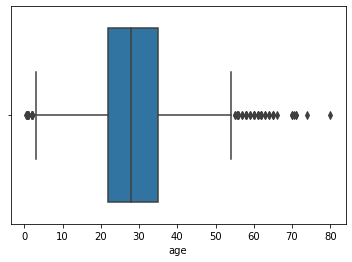

In [28]:
sns.boxplot(dataset["age"])

In [32]:
q1 = dataset["age"].describe()["25%"]
q3 = dataset["age"].describe()["75%"]

In [33]:
iqr = q3 - q1

In [34]:
l_bondary = q1 - (1.5 * iqr)

In [36]:
u_bondary = q3 + (1.5 * iqr)


In [39]:
dataset[dataset["age"] < l_bondary]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,Southampton,no,False
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,Queenstown,no,False
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,Southampton,no,False
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,Southampton,yes,False
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,Southampton,no,False
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,Southampton,no,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False


In [41]:
(dataset[dataset["age"] < l_bondary].shape[0]/dataset["age"].shape[0])*100

2.6936026936026933

# the lower boundary has around 3% in outliers so it is neglectable

In [43]:
dataset[dataset["age"] > u_bondary]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,Southampton,yes,True
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,Southampton,yes,True
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,Cherbourg,no,False
94,0,3,male,59.0,0,0,7.2500,S,Third,man,True,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,Queenstown,no,True
152,0,3,male,55.5,0,0,8.0500,S,Third,man,True,Southampton,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,Southampton,no,True
174,0,1,male,56.0,0,0,30.6958,C,First,man,True,Cherbourg,no,True


In [45]:
(dataset[dataset["age"] > u_bondary].shape[0]/dataset["age"].shape[0])*100

4.713804713804714

# the lower boundary has around 5% in outliers so it is neglectable

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived'>

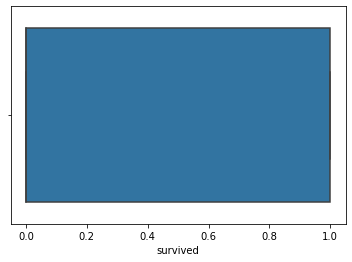

In [47]:
sns.boxplot(dataset["survived"])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp'>

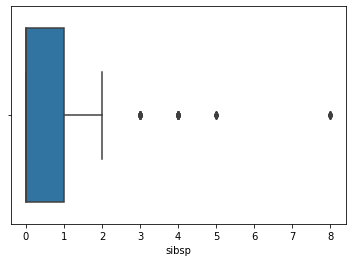

In [49]:
sns.boxplot(dataset["sibsp"])

In [51]:
q1_sibsp = dataset["sibsp"].describe()["25%"]
q3_sibsp = dataset["sibsp"].describe()["75%"]
iqr_sibsp = q3_sibsp - q1_sibsp

In [52]:
l_bondary = q1_sibsp - (1.5 * iqr_sibsp)
u_bondary = q3_sibsp + (1.5 * iqr_sibsp)

In [54]:
dataset[dataset["sibsp"] > u_bondary]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,Southampton,no,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,Southampton,no,False
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,Southampton,yes,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,Southampton,no,False
85,1,3,female,33.0,3,0,15.8500,S,Third,woman,False,Southampton,yes,False


In [56]:
(dataset[dataset["sibsp"] > u_bondary].shape[0]/dataset["sibsp"].shape[0])*100

5.16273849607183

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parch'>

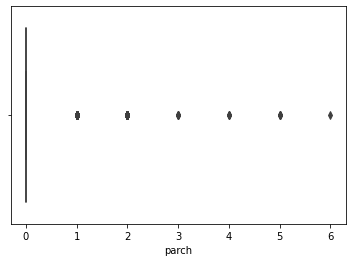

In [58]:
sns.boxplot(dataset["parch"])

In [60]:
q1_parch = dataset["parch"].describe()["25%"]
q3_parch = dataset["parch"].describe()["75%"]
iqr_parch = q3_parch - q1_parch
l_bondary = q1_parch - (1.5 * iqr_parch)
u_bondary = q3_parch + (1.5 * iqr_parch)

In [62]:
dataset[dataset["parch"] > u_bondary]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,Southampton,yes,False
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,Southampton,yes,False
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False


In [67]:
(dataset[dataset["parch"] > u_bondary].shape[0]/dataset["parch"].shape[0])*100

23.905723905723907

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

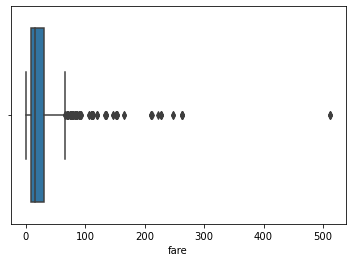

In [69]:
sns.boxplot(dataset["fare"])

In [71]:
q1_fare = dataset["fare"].describe()["25%"]
q3_fare = dataset["fare"].describe()["75%"]
iqr_fare = q3_fare - q1_fare
l_bondary = q1_fare - (1.5 * iqr_fare)
u_bondary = q3_fare + (1.5 * iqr_fare)

In [73]:
dataset[dataset["fare"] > u_bondary]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False
31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,28.0,8,2,69.5500,S,Third,man,True,Southampton,no,False
849,1,1,female,28.0,1,0,89.1042,C,First,woman,False,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,Southampton,yes,False
863,0,3,female,28.0,8,2,69.5500,S,Third,woman,False,Southampton,no,False


In [75]:
(dataset[dataset["fare"] > u_bondary].shape[0]/dataset["fare"].shape[0])*100

13.019079685746352

# Data visualisation using seaborn and matplotlib

# 1.  Sex of passengers survived based on age

<AxesSubplot:xlabel='sex', ylabel='age'>

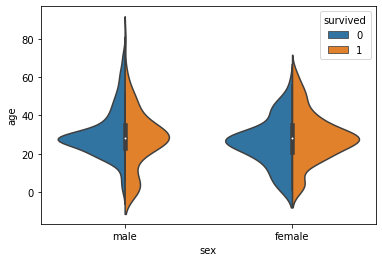

In [81]:
sns.violinplot(x = "sex",y = "age",hue = "survived",data = dataset,split = True)

# 2.Number of survived VS Age of passnegers

<AxesSubplot:xlabel='survived', ylabel='age'>

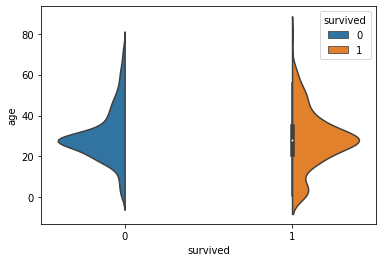

In [107]:
sns.violinplot(x = "survived",y = "age",hue = "survived",data = dataset,split = True)

#  3.  Number of passengers from each country

In [82]:
embtn = dataset["embark_town"].value_counts()

In [83]:
embtn

Southampton    644
Cherbourg      168
Queenstown      77
S                2
Name: embark_town, dtype: int64

In [84]:
embtn.index

Index(['Southampton', 'Cherbourg', 'Queenstown', 'S'], dtype='object')

In [85]:
embtn.values

array([644, 168,  77,   2], dtype=int64)

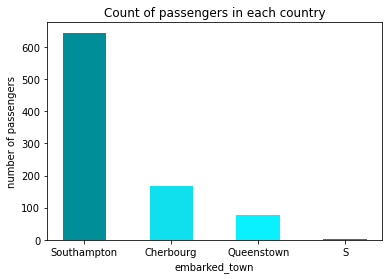

In [86]:
plt.bar(embtn.index, embtn.values, color = ["#008E98", "#10DFEE", "#09F0FF"], width = 0.5)
plt.xlabel("embarked_town")
plt.ylabel("number of passengers")
plt.title("Count of passengers in each country")
plt.show()

# 4. Number of Woman,Man and Child

In [87]:
who = dataset["who"].value_counts()

In [88]:
who

man      537
woman    271
child     83
Name: who, dtype: int64

In [89]:
who.index

Index(['man', 'woman', 'child'], dtype='object')

In [90]:
who.values

array([537, 271,  83], dtype=int64)

In [92]:
explode = np.zeros(len(who))

In [93]:
explode

array([0., 0., 0.])

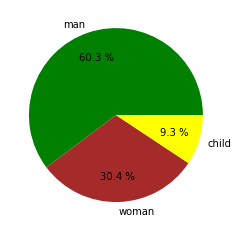

In [94]:
plt.pie(who.values,labels=who.index, autopct = "%.1f %%",colors=["green","brown","yellow"], explode = explode, pctdistance= 0.7)
plt.show()

# 5.Pclass VS Survived

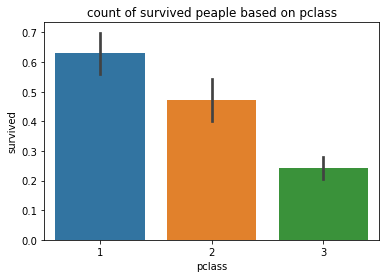

In [96]:
sns.barplot(data = dataset,x="pclass",y="survived")
plt.xlabel("pclass")
plt.ylabel("survived")
plt.title("count of survived peaple based on pclass")
plt.show()

# 6.Ticket fare VS Pclass

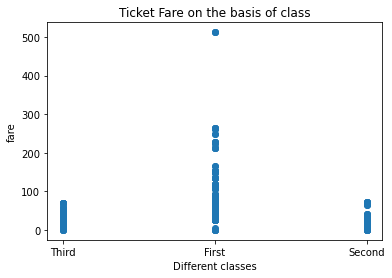

In [97]:
plt.scatter(data = dataset, x= "class",y = "fare")
plt.xlabel("Different classes")
plt.ylabel("fare")
plt.title("Ticket Fare on the basis of class")
plt.show()

# 7.Number of survived VS passengers

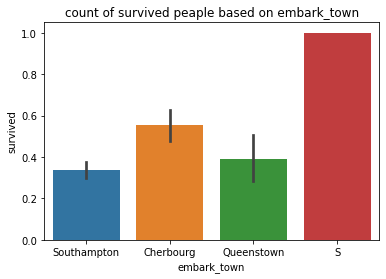

In [98]:
sns.barplot(data = dataset,x="embark_town",y="survived")
plt.xlabel("embark_town")
plt.ylabel("survived")
plt.title("count of survived peaple based on embark_town")
plt.show()

#  8.Number of males and female vs dead or survived passengers

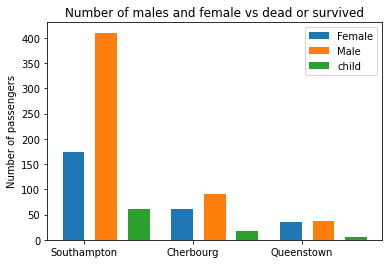

In [100]:
smale = dataset[(dataset["embark_town"] == "Southampton")  & (dataset["who"] == "man")].shape[0]
cmale = dataset[(dataset["embark_town"] == "Cherbourg")  & (dataset["who"] == "man")].shape[0]
qmale = dataset[(dataset["embark_town"] == "Queenstown")  & (dataset["who"] == "man")].shape[0]

sfemale = dataset[(dataset["embark_town"] == "Southampton")  & (dataset["who"] == "woman")].shape[0]
cfemale = dataset[(dataset["embark_town"] == "Cherbourg")  & (dataset["who"] == "woman")].shape[0]
qfemale = dataset[(dataset["embark_town"] == "Queenstown")  & (dataset["who"] == "woman")].shape[0]

schild = dataset[(dataset["embark_town"] == "Southampton")  & (dataset["who"] == "child")].shape[0]
cchild = dataset[(dataset["embark_town"] == "Cherbourg")  & (dataset["who"] == "child")].shape[0]
qchild = dataset[(dataset["embark_town"] == "Queenstown")  & (dataset["who"] == "child")].shape[0]


X = ['Southampton', 'Cherbourg', 'Queenstown']
male = [smale,cmale,qmale]
female = [sfemale,cfemale,qfemale]
child = [schild,cchild,qchild]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, female, 0.2, label = 'Female')
plt.bar(X_axis + 0.2, male, 0.2, label = 'Male')
plt.bar(X_axis + 0.5, child, 0.2, label = 'child')
  
plt.xticks(X_axis, X)
plt.ylabel("Number of passengers")
plt.title("Number of males and female vs dead or survived")
plt.legend()
plt.show()

# 9. Count of survived people on basis of town

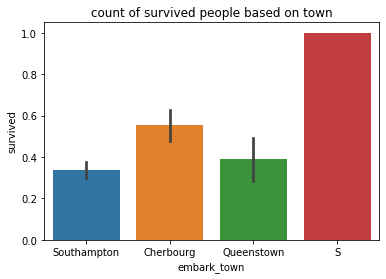

In [106]:
sns.barplot(data = dataset, x= "embark_town",y = "survived")
plt.xlabel("embark_town")
plt.ylabel("survived")
plt.title("count of survived people based on town")
plt.show()

# 10.Gender VS Number of Passengers

In [101]:
sex = dataset["sex"].value_counts()
sex.index

Index(['male', 'female'], dtype='object')

In [102]:
sex.values

array([577, 314], dtype=int64)

In [103]:
explode = np.zeros(len(sex))
explode

array([0., 0.])

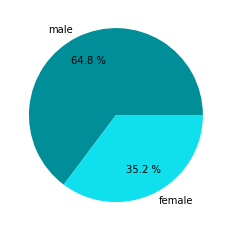

In [104]:
plt.pie(sex.values, labels = sex.index, autopct = "%.1f %%", colors = ["#008E98", "#10DFEE"], 
        explode = explode, pctdistance=0.7)
plt.show()

# 11.Ticket fare VS Pclass

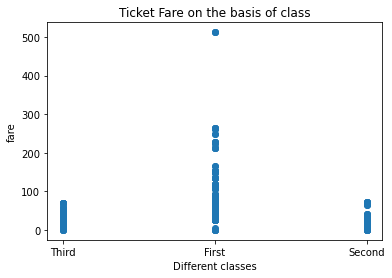

In [105]:
plt.scatter(data = dataset, x= "class",y = "fare")
plt.xlabel("Different classes")
plt.ylabel("fare")
plt.title("Ticket Fare on the basis of class")
plt.show()